## import the libraries

In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2 as cv
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

2024-04-19 10:02:30.048049: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-19 10:02:30.049683: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-19 10:02:30.110953: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-19 10:02:30.337588: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-19 10:02:31.221032: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

## load data

In [3]:
image_Handgun = "/home/pc29/Desktop/archive(1)/weapon_detection/train/Handgun"
image_AutomaticRifle = "/home/pc29/Desktop/archive(1)/weapon_detection/train/Automatic Rifle"
image_Bazooka = "/home/pc29/Desktop/archive(1)/weapon_detection/train/Bazooka"
image_GL= "/home/pc29/Desktop/archive(1)/weapon_detection/train/Grenade Launcher"
image_Sword = "/home/pc29/Desktop/archive(1)/weapon_detection/train/Sword"
image_Shotgun = "/home/pc29/Desktop/archive(1)/weapon_detection/train/Shotgun"
image_SMG = "/home/pc29/Desktop/archive(1)/weapon_detection/train/SMG"
image_Sniper = "/home/pc29/Desktop/archive(1)/weapon_detection/train/Sniper"
image_Knife = "/home/pc29/Desktop/archive(1)/weapon_detection/train/Knife"
image_list = []
count = 0

for filename in os.listdir(image_AutomaticRifle):
    if count == 59:
        break
    try:
        img = cv.imread(f"/home/pc29/Desktop/archive(1)/weapon_detection/train/Automatic Rifle/{filename}")
        img_resized = cv.resize(img, (150, 150))
        img_array = np.array(img_resized)
        image_list.append(img_array)
        count += 1
    except Exception as e:
        print(f'Error: {e}')

for image in os.listdir(image_Bazooka):
    if count == 113:
        break
    try:
        img2 = cv.imread(f"/home/pc29/Desktop/archive(1)/weapon_detection/train/Bazooka/{image}")
        img2 = cv.resize(img2, (150, 150))
        img_array2 = np.array(img2)
        image_list.append(img_array2)
        count += 1
    except Exception as e:
        print(f'Error: {e}')


for image in os.listdir(image_Shotgun):
    if count == 175:
        break
    try:
        img2 = cv.imread(f"/home/pc29/Desktop/archive(1)/weapon_detection/train/Shotgun/{image}")
        img2 = cv.resize(img2, (150, 150))
        img_array2 = np.array(img2)
        image_list.append(img_array2)
        count += 1
    except Exception as e:
        print(f'Error: {e}')

for image in os.listdir(image_SMG):
    if count == 245:
        break
    try:
        img2 = cv.imread(f"/home/pc29/Desktop/archive(1)/weapon_detection/train/SMG/{image}")
        img2 = cv.resize(img2, (150, 150))
        img_array2 = np.array(img2)
        image_list.append(img_array2)
        count += 1
    except Exception as e:
        print(f'Error: {e}')

for image in os.listdir(image_Knife):
    if count == 303:
        break
    try:
        img2 = cv.imread(f"/home/pc29/Desktop/archive(1)/weapon_detection/train/Knife/{image}")
        img2 = cv.resize(img2, (150, 150))
        img_array2 = np.array(img2)
        image_list.append(img_array2)
        count += 1
    except Exception as e:
        print(f'Error: {e}')

for image in os.listdir(image_Sword):
    if count == 374:
        break
    try:
        img2 = cv.imread(f"/home/pc29/Desktop/archive(1)/weapon_detection/train/Sword/{image}")
        img2 = cv.resize(img2, (150, 150))
        img_array2 = np.array(img2)
        image_list.append(img_array2)
        count += 1
    except Exception as e:
        print(f'Error: {e}')

for image in os.listdir(image_GL):
    if count == 444:
        break
    try:
        img2 = cv.imread(f"/home/pc29/Desktop/archive(1)/weapon_detection/train/Grenade Launcher/{image}")
        img2 = cv.resize(img2, (150, 150))
        img_array2 = np.array(img2)
        image_list.append(img_array2)
        count += 1
    except Exception as e:
        print(f'Error: {e}')

for image in os.listdir(image_Handgun):
    if count == 500:
        break
    try:
        img2 = cv.imread(f"/home/pc29/Desktop/archive(1)/weapon_detection/train/Handgun/{image}")
        img2 = cv.resize(img2, (150, 150))
        img_array2 = np.array(img2)
        image_list.append(img_array2)
        count += 1
    except Exception as e:
        print(f'Error: {e}')

for image in os.listdir(image_Sniper):
    if count == 571:
        break
    try:
        img2 = cv.imread(f"/home/pc29/Desktop/archive(1)/weapon_detection/train/Sniper/{image}")
        img2 = cv.resize(img2, (150, 150))
        img_array2 = np.array(img2)
        image_list.append(img_array2)
        count += 1
    except Exception as e:
        print(f'Error: {e}')


In [4]:
len(image_Handgun)

60

In [5]:
len(image_Knife)

58

In [6]:
len(image_list)

571

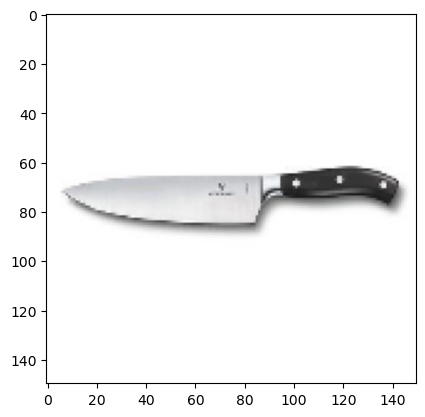

In [19]:
plt.imshow(image_list[250][:,:,::-1])

## create labels

In [27]:
label_list = []
for i in range(59):
    label_list.append(8)
for j in range(113):
    label_list.append(7)
for k in range(175):
    label_list.append(6)
for l in range(245):
    label_list.append(5)
for m in range(303):
    label_list.append(4)
for n in range(374):
    label_list.append(3)
for o in range(444):
    label_list.append(2)
for p in range(500):
    label_list.append(1)
for n in range(571):
    label_list.append(0)

In [28]:
label_list[166]

7

## rajdomize labels and images

In [29]:
combined = list(zip(label_list, image_list))
random.shuffle(combined)
shuffled_labels, shuffled_images = zip(*combined)

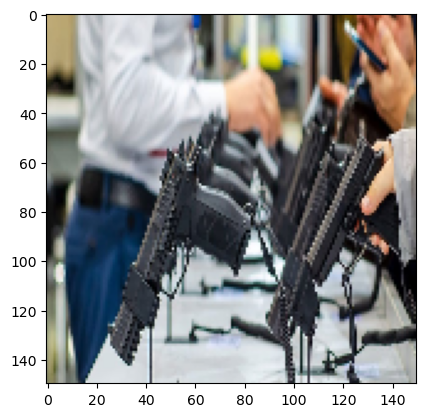

In [30]:
plt.imshow(shuffled_images[300][:,:,::-1])

In [31]:
shuffled_labels[400]

5

In [32]:
image_array = np.array(shuffled_images) 
labels_array = np.array(shuffled_labels)

## split data for test and validation

In [33]:
x_train, x_test, y_train, y_test = train_test_split(image_array, labels_array, test_size=0.2)

In [34]:
x_train1, x_validation, y_train1, y_validation = train_test_split(x_train, y_train, test_size=0.15)

## augmentation data model

In [35]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip('horizontal'),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.2)
])

## callback

In [36]:
callback = keras.callbacks.EarlyStopping(patience=4, monitor='val_loss')

## CNN model

In [37]:
inputs = keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)
x = keras.layers.Rescaling(1./255)(x)
x = keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.5)(x)
output = keras.layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=output)

In [38]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         6,401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 984,897 (3.76 MB)

 Trainable params: 984,897 (3.76 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [41]:
history = model.fit(x_train1, y_train1, validation_data=(x_validation, y_validation), epochs=20)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 176ms/step - accuracy: 0.0000e+00 - loss: -2866372.2500 - val_accuracy: 0.0000e+00 - val_loss: -98836928.0000
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - accuracy: 0.0000e+00 - loss: -468202016.0000 - val_accuracy: 0.0000e+00 - val_loss: -3301008640.0000
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - accuracy: 0.0000e+00 - loss: -6706784256.0000 - val_accuracy: 0.0000e+00 - val_loss: -22964174848.0000
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - accuracy: 0.0000e+00 - loss: -34832908288.0000 - val_accuracy: 0.0000e+00 - val_loss: -84201496576.0000
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - accuracy: 0.0000e+00 - loss: -118897188864.0000 - val_accuracy: 0.0000e+00 - val_loss: -233694674944.0000
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - accuracy: 0.0000e+00 - loss: -305570906112.0000 - val_accuracy: 0.0000e+00 - val_loss: -530935709696.0000
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 181ms/step - accur

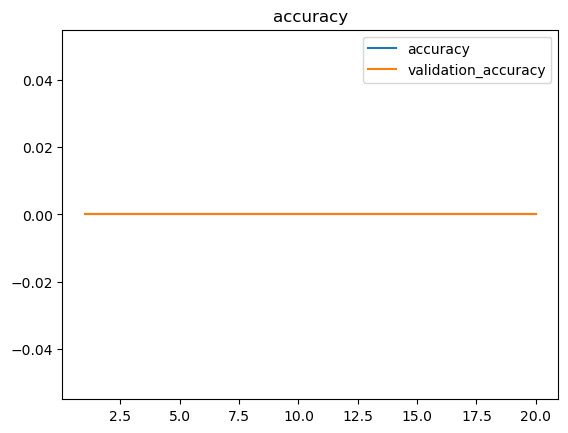

In [42]:
my_dict = history.history
accuracy = my_dict['accuracy']
val_accuracy = my_dict['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, label='accuracy')
plt.plot(epochs, val_accuracy, label='validation_accuracy')
plt.title('accuracy')
plt.legend()

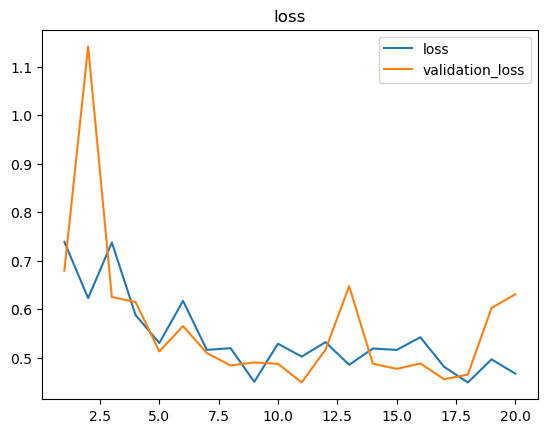

In [23]:
loss = my_dict['loss']
val_loss = my_dict['val_loss']
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='validation_loss')
plt.title('loss')
plt.legend()

In [24]:
model.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6888 - loss: 0.5525


[0.5068597793579102, 0.6907216310501099]

In [25]:
y_pred = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


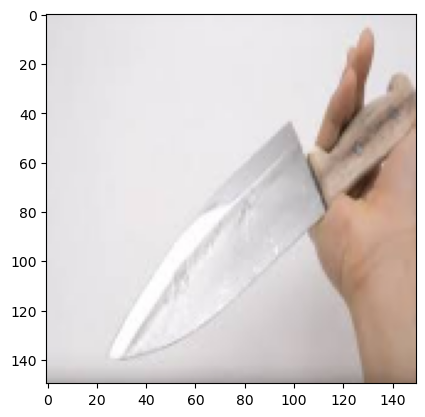

In [26]:
plt.imshow(x_test[90][:,:,::-1])

In [27]:
y_test[90]

0

In [28]:
xception_bace = keras.applications.vgg16.VGG16(include_top=False)
x = keras.layers.GlobalAveragePooling2D()(xception_bace.output)
output = keras.layers.Dense(1, activation='sigmoid')(x)
model2 = keras.Model(inputs=xception_bace.input, outputs=output)

In [29]:
for layer in xception_bace.layers:
  layer.trainable = False

In [30]:
model2.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [31]:
history2 = model2.fit(x_train1, y_train1, validation_data=(x_validation, y_validation), epochs=20)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.2758 - loss: 6.8663 - val_accuracy: 0.5085 - val_loss: 3.9483
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.4938 - loss: 3.6835 - val_accuracy: 0.6949 - val_loss: 2.4912
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.6777 - loss: 1.6159 - val_accuracy: 0.7458 - val_loss: 1.3800
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8060 - loss: 0.9731 - val_accuracy: 0.8136 - val_loss: 0.7257
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8587 - loss: 0.6077 - val_accuracy: 0.8475 - val_loss: 0.3862
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9026 - loss: 0.3741 - val_accuracy: 0.8644 - val_loss: 0.2471
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9104 - loss: 0.3766 - val_accuracy: 0.9153 - val_loss: 0.1201
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9306 - loss: 0.2086 - val_accuracy: 0.9492 - val_loss:

In [32]:
model2.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,716,229 (56.14 MB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 1,028 (4.02 KB)

In [33]:
model.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6888 - loss: 0.5525 


[0.5068597793579102, 0.6907216310501099]

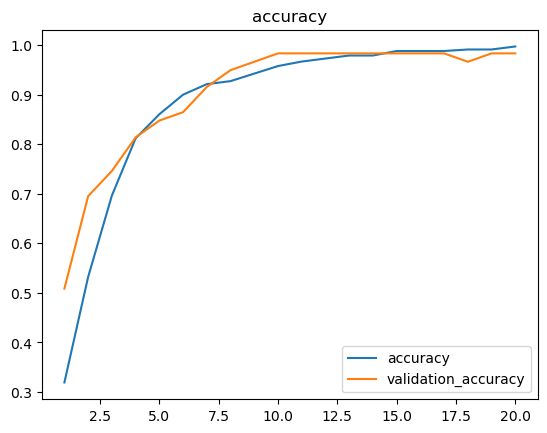

In [34]:
my_dict = history2.history
accuracy = my_dict['accuracy']
val_accuracy = my_dict['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, label='accuracy')
plt.plot(epochs, val_accuracy, label='validation_accuracy')
plt.title('accuracy')
plt.legend()

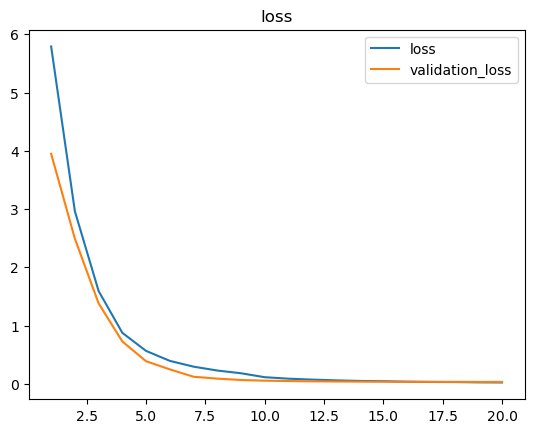

In [35]:
loss = my_dict['loss']
val_loss = my_dict['val_loss']
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='validation_loss')
plt.title('loss')
plt.legend()

## MobileNetV2

In [47]:
from tensorflow.keras.applications.mobilenet import MobileNet

In [48]:
xception_bace = keras.applications.ResNet50(include_top=False)
x = keras.layers.GlobalAveragePooling2D()(xception_bace.output)
output = keras.layers.Dense(1, activation='sigmoid')(x)
model2 = keras.Model(inputs=xception_bace.input, outputs=output)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


In [49]:
for layer in xception_bace.layers:
  layer.trainable = False

In [50]:
model2.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [51]:
history3 = model2.fit(x_train1, y_train1, validation_data=(x_validation, y_validation), epochs=20)

Epoch 1/20


11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 569ms/step - accuracy: 0.6845 - loss: 0.6101 - val_accuracy: 0.9661 - val_loss: 0.2159
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 489ms/step - accuracy: 0.9296 - loss: 0.1925 - val_accuracy: 0.9831 - val_loss: 0.1117
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 479ms/step - accuracy: 0.9570 - loss: 0.1083 - val_accuracy: 0.9831 - val_loss: 0.0842
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 478ms/step - accuracy: 0.9671 - loss: 0.0933 - val_accuracy: 0.9831 - val_loss: 0.0618
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 480ms/step - accuracy: 0.9926 - loss: 0.0512 - val_accuracy: 0.9831 - val_loss: 0.0615
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 480ms/step - accuracy: 0.9889 - loss: 0.0532 - val_accuracy: 1.0000 - val_loss: 0.0515
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 479ms/step - accuracy: 0.9863 - loss: 0.0398 - val_accuracy: 1.0000 - val_loss: 0.0505
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 487ms/step - accuracy: 0.9977 - loss: 0.0322 - val_accuracy: 1.0000 - val_

In [52]:
model2.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, None,      │          0 │ input_layer_6[0]… │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, None,      │      9,472 │ conv1_pad[0][0]   │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, None,      │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, None,      │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, None,      │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, None,      │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, None,      │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, None,      │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, None,      │          0 │ conv2_block1_1_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, None,      │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, None,      │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, None,      │          0 │ conv2_block1_2_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, None,      │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, None,      │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, None,      │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, None,      │      1,024 │ conv2_block1_3_c

 Total params: 23,593,861 (90.00 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 4,100 (16.02 KB)

In [53]:
model2.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step - accuracy: 0.9720 - loss: 0.0850


[0.08797237277030945, 0.969072163105011]

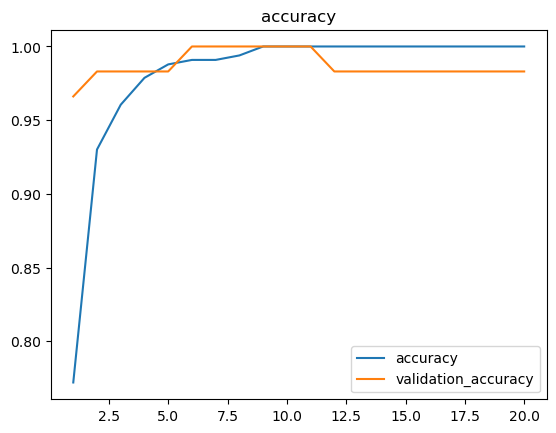

In [54]:
my_dict = history3.history
accuracy = my_dict['accuracy']
val_accuracy = my_dict['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, label='accuracy')
plt.plot(epochs, val_accuracy, label='validation_accuracy')
plt.title('accuracy')
plt.legend()

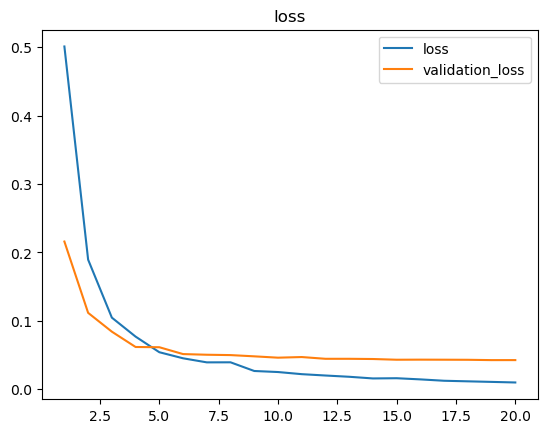

In [55]:
loss = my_dict['loss']
val_loss = my_dict['val_loss']
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='validation_loss')
plt.title('loss')
plt.legend()

## MobileNetV2

In [57]:
xception_bace = keras.applications.MobileNetV2(include_top=False)
x = keras.layers.GlobalAveragePooling2D()(xception_bace.output)
output = keras.layers.Dense(1, activation='sigmoid')(x)
model2 = keras.Model(inputs=xception_bace.input, outputs=output)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [58]:
for layer in xception_bace.layers:
  layer.trainable = False

In [59]:
model2.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [61]:
history4 = model2.fit(x_train1, y_train1, validation_data=(x_validation, y_validation), epochs=20)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 204ms/step - accuracy: 0.8296 - loss: 0.3364 - val_accuracy: 0.8136 - val_loss: 0.4312
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step - accuracy: 0.8868 - loss: 0.2868 - val_accuracy: 0.8305 - val_loss: 0.4061
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - accuracy: 0.8679 - loss: 0.2997 - val_accuracy: 0.8305 - val_loss: 0.4160
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 185ms/step - accuracy: 0.8896 - loss: 0.2701 - val_accuracy: 0.8475 - val_loss: 0.4002
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - accuracy: 0.8813 - loss: 0.2640 - val_accuracy: 0.8305 - val_loss: 0.4036
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - accuracy: 0.8995 - loss: 0.2616 - val_accuracy: 0.8644 - val_loss: 0.3977
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 193ms/step - accuracy: 0.9104 - loss: 0.2325 - val_accuracy: 0.8475 - val_loss: 0.4017
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 197ms/step - accuracy: 0.9350 - loss: 0.1925 - val_accuracy: 0.

In [62]:
model2.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, None,      │        864 │ input_layer_7[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, None,      │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, None,      │          0 │ bn_Conv1[0][0]    │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, None,      │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, None,      │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, None,      │          0 │ expanded_conv_de… │
│ (ReLU)              │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, None,      │        512 │ expanded_conv_de… │
│ (Conv2D)            │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, None,      │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, None,      │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, None,      │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, None,      │          0 │ block_1_expand_B… │
│ (ReLU)              │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, None,      │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, None,      │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, None,      │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, None,      │          0 │ block_1_depthwis… │
│ (ReLU)              │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, None,      │      2,304 │ block_1_depthwis

 Total params: 2,261,829 (8.63 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2,564 (10.02 KB)

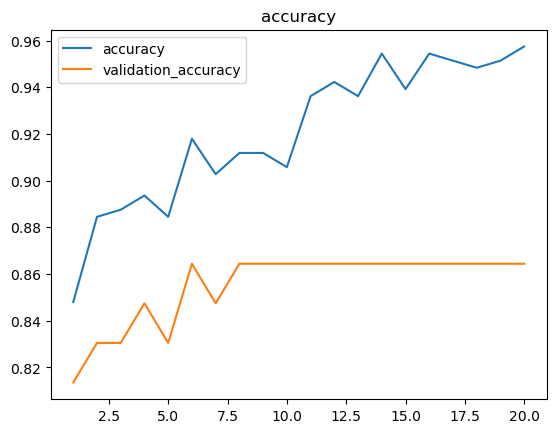

In [63]:
my_dict = history4.history
accuracy = my_dict['accuracy']
val_accuracy = my_dict['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, label='accuracy')
plt.plot(epochs, val_accuracy, label='validation_accuracy')
plt.title('accuracy')
plt.legend()

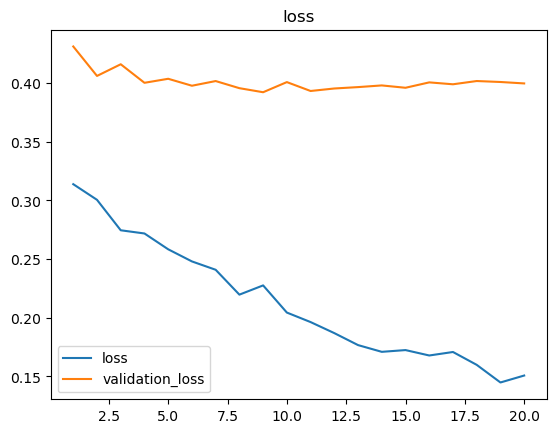

In [64]:
loss = my_dict['loss']
val_loss = my_dict['val_loss']
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='validation_loss')
plt.title('loss')
plt.legend()

## IneptionV3

In [65]:
xception_bace = keras.applications.InceptionV3(include_top=False)
x = keras.layers.GlobalAveragePooling2D()(xception_bace.output)
output = keras.layers.Dense(1, activation='sigmoid')(x)
model2 = keras.Model(inputs=xception_bace.input, outputs=output)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


In [66]:
for layer in xception_bace.layers:
  layer.trainable = False

In [67]:
model2.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [68]:
history5 = model2.fit(x_train1, y_train1, validation_data=(x_validation, y_validation), epochs=20)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 313ms/step - accuracy: 0.5104 - loss: 19.0248 - val_accuracy: 0.7458 - val_loss: 4.0596
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 243ms/step - accuracy: 0.7884 - loss: 5.0955 - val_accuracy: 0.6780 - val_loss: 6.2848
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 240ms/step - accuracy: 0.7798 - loss: 4.6989 - val_accuracy: 0.7797 - val_loss: 3.2121
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 234ms/step - accuracy: 0.7626 - loss: 3.6048 - val_accuracy: 0.8475 - val_loss: 3.0205
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 231ms/step - accuracy: 0.8103 - loss: 2.7677 - val_accuracy: 0.8475 - val_loss: 3.1349
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step - accuracy: 0.8406 - loss: 2.3110 - val_accuracy: 0.8475 - val_loss: 3.0465
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step - accuracy: 0.7988 - loss: 1.8789 - val_accuracy: 0.8136 - val_loss: 2.9436
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step - accuracy: 0.8669 - loss: 2.2216 - val_accuracy: 0

In [69]:
model2.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, None,      │        864 │ input_layer_8[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, None,      │         96 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, None,      │      9,216 │ activation[0][0]  │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │         96 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, None,      │     18,432 │ activation_1[0][… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        192 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, None,      │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, None,      │      5,120 │ max_pooling2d_4[… │
│                     │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        240 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, None,      │    138,240 │ activation_3[0][… │
│                     │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        576 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, None,      │          0 │ batch_normalizat

 Total params: 21,808,933 (83.19 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

 Optimizer params: 4,100 (16.02 KB)

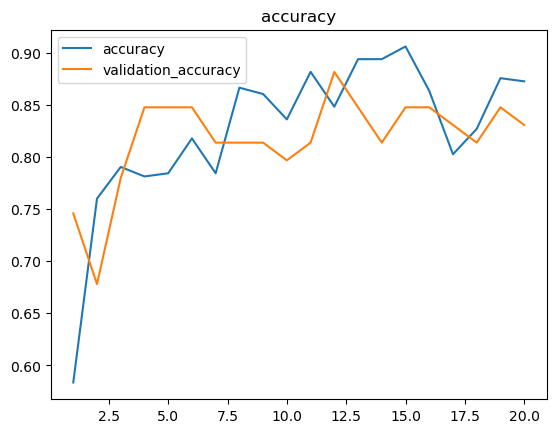

In [70]:
my_dict = history5.history
accuracy = my_dict['accuracy']
val_accuracy = my_dict['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, label='accuracy')
plt.plot(epochs, val_accuracy, label='validation_accuracy')
plt.title('accuracy')
plt.legend()

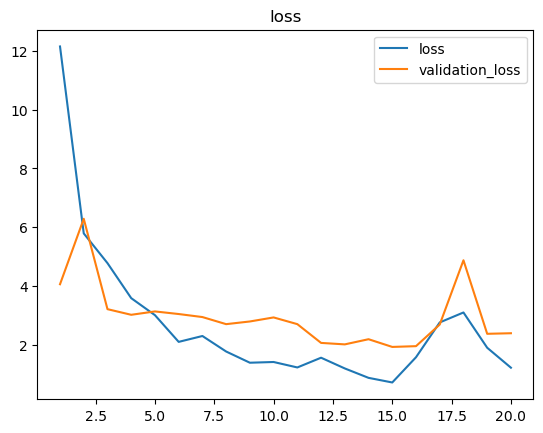

In [71]:
loss = my_dict['loss']
val_loss = my_dict['val_loss']
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='validation_loss')
plt.title('loss')
plt.legend()